## Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

**Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Read The Data Using Pandas**

In [2]:
url = "http://bit.ly/w-data"
mydata= pd.read_csv(url)
print("Data imported successfully")

mydata.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
mydata.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
mydata.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Exploratory Data Analysis**

## correlation

In [6]:
mydata_corr=mydata.corr()
mydata_corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


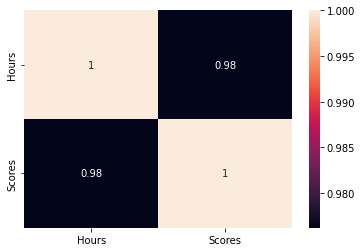

In [7]:
sns.heatmap(mydata_corr,annot=True)

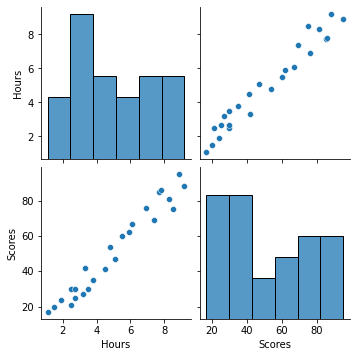

In [8]:
sns.pairplot(mydata);

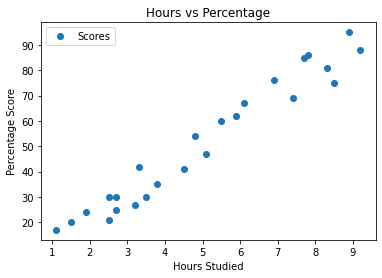

In [9]:
# Plotting the distribution of scores
mydata.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Splitting the test and train dataset

In [10]:
y_dep=mydata.Scores
y_dep

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [11]:
x_ind=mydata.drop("Scores",axis=1)
x_ind

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [35]:
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [36]:
x_test,x_train,y_test,y_train=train_test_split(x_ind,y_dep,train_size=0.8,random_state=0)

In [37]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [38]:
model=LinearRegression()

In [39]:
model.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred=model.predict(x_test)
y_pred

array([38.94130256, 22.10288541, 74.39060181, 66.41450948, 15.01302556,
       50.46232481, 73.50436933, 34.51014015, 78.82176422, 86.79785655,
       59.32464963, 36.28260511, 29.19274526, 54.00725474, 29.19274526,
       80.59422918, 27.4202803 , 47.80362737, 84.13915911, 45.14492993])

In [41]:
model.score(x_test,y_test)

0.932987549855721

**checking a p-value and R square value**

In [42]:
import statsmodels.api as sm

In [43]:
Model=sm.OLS(y_dep,x_ind)

In [44]:
my_fit=Model.fit()

In [45]:
my_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Scores   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              2579.
Date:                Mon, 21 Feb 2022   Prob (F-statistic):                    6.10e-26
Time:                        14:39:27   Log-Likelihood:                         -78.026
No. Observations:                  25   AIC:                                      158.1
Df Residuals:                      24   BIC:                                      159.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Hours         10.1743      0.200     50.787      0.000       9.761      10.588
==============================================================================
Omnibus:                        4.755   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                2.042
Skew:                          -0.363   Prob(JB):                        0.360
Kurtosis:                       1.803   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

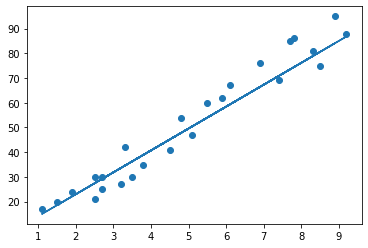

In [47]:
# Plotting the regression line
line=model.coef_*x_ind+model.intercept_
# Plotting for the test data
plt.scatter(x_ind,y_dep)
plt.plot(x_ind, line);
plt.show()

**Residual**

In [48]:
f_com=pd.DataFrame({"Actual":y_test,"Machine_predicted":y_pred})
f_com

,Actual,Machine_predicted
22,35,38.941303
17,24,22.102885
24,86,74.390602
23,76,66.414509
14,17,15.013026
1,47,50.462325
10,85,73.504369
13,42,34.510140
8,81,78.821764
6,88,86.797857


In [49]:
Res=y_pred-y_test
Res

22     3.941303
17    -1.897115
24   -11.609398
23    -9.585491
14    -1.986974
1      3.462325
10   -11.495631
13    -7.489860
8     -2.178236
6     -1.202143
18    -7.675350
4      6.282605
9      4.192745
7     -5.992745
20    -0.807255
3      5.594229
0      6.420280
21    -6.196373
15   -10.860841
12     4.144930
Name: Scores, dtype: float64

In [50]:
y_pred=model.predict(x_test)

Prediction

In [51]:
# You can also test with your own data
hours = 9.25
hours=np.reshape(hours,(1,-1))
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 87.2409727947238


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [52]:
from sklearn.metrics import mean_squared_error as ms

In [53]:
mean_sqr=ms(y_test,y_pred)
mean_sqr

42.73702254838862

In [54]:
root_mean_sqr=np.sqrt(mean_sqr)
root_mean_sqr

6.537355929455625

In [55]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.650791426215993


In [56]:
mam=f_com.head(100)
mam

,Actual,Machine_predicted
22,35,38.941303
17,24,22.102885
24,86,74.390602
23,76,66.414509
14,17,15.013026
1,47,50.462325
10,85,73.504369
13,42,34.510140
8,81,78.821764
6,88,86.797857
